## Analyzing a dataset using Pandas, NumPy, data visualization using Matplotlib.

### Dataset
Students Exam Scores: Extended Dataset
https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

In [234]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

# Pipeline
from sklearn.pipeline import Pipeline

# Scaler for standardization
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer

# Customizing Matplotlib plots
plt.style.use('tableau-colorblind10')

In [145]:
# Read the CSV file containing the dataset.
data = pd.read_csv("data/Expanded_data_with_more_features.csv")

In [146]:
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


### Проаналізуйте розподіл за статтю серед учнів

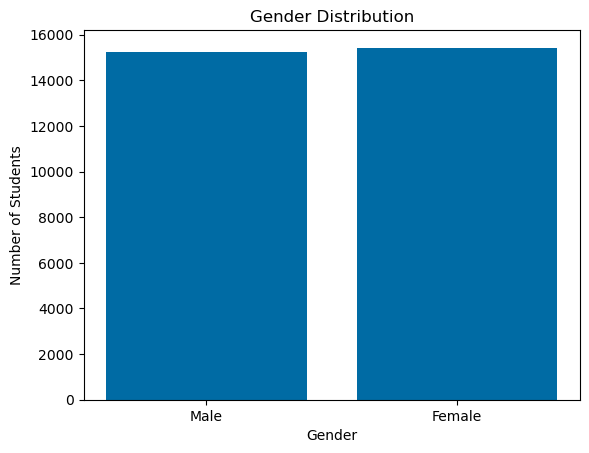

In [147]:
male_students = data[data["Gender"] == "male"]
female_students = data[data["Gender"] == "female"]

num_male_students = len(male_students)
num_female_students = len(female_students)

# Plotting the gender distribution
plt.bar(["Male", "Female"], [num_male_students, num_female_students])
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.title("Gender Distribution")
plt.show()

In [148]:
# 1. Скільки студентів і студенток у наборі даних?
num_male_students + num_female_students

30641

In [149]:
# 2. Який відсоток студентів чоловічої статі в наборі даних?
male_percentage = (num_male_students / (num_male_students + num_female_students)) * 100
male_percentage

49.6622172905584

In [150]:
# 3. Який відсоток студенток у наборі даних?
female_percentage = (num_female_students / (num_male_students + num_female_students)) * 100
female_percentage

50.337782709441605

### Дослідіть зв’язок між етнічною групою та результатами тестів.

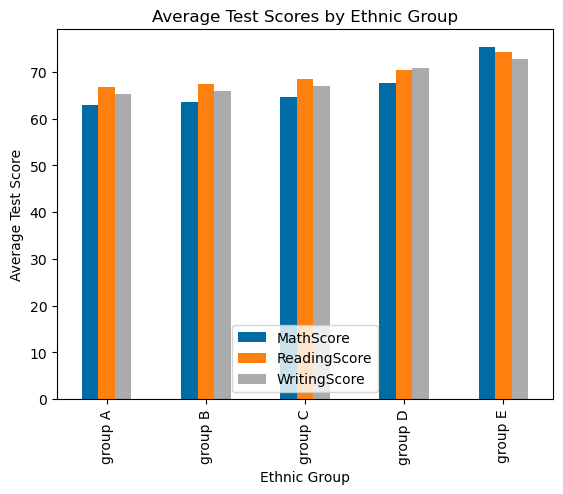

In [151]:
ethnic_group_means = data[["EthnicGroup", "MathScore","ReadingScore","WritingScore"]].groupby("EthnicGroup").mean()

# Plotting the average test scores by ethnicity
ethnic_group_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Ethnic Group")
plt.ylabel("Average Test Score")
plt.title("Average Test Scores by Ethnic Group")
plt.show()

In [152]:
# 4. Яка етнічна група має найвищий середній бал з математики?
highest_math_score_group = ethnic_group_means["MathScore"].idxmax()
highest_math_score_group

'group E'

In [153]:
# 5. Яка етнічна група має найвищий середній бал читання?
highest_reading_score_group = ethnic_group_means["ReadingScore"].idxmax()
highest_reading_score_group

'group E'

In [154]:
# 6. Яка етнічна група має найвищий середній бал з письма?
highest_writing_score_group = ethnic_group_means["WritingScore"].idxmax()
highest_writing_score_group

'group E'

### Дослідіть вплив курсу підготовки до тесту на результати тесту.

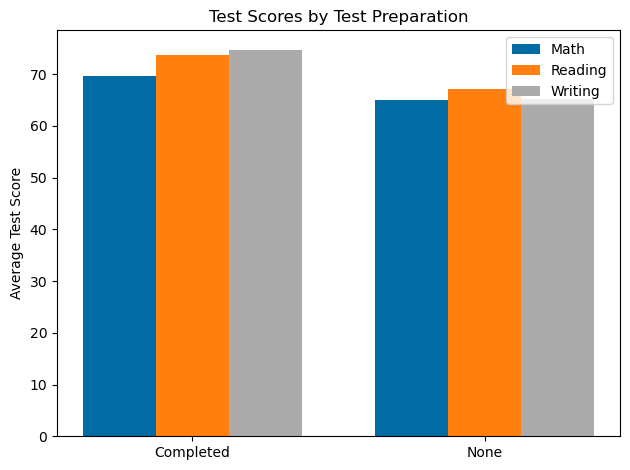

In [155]:
test_prep_students = data[data["TestPrep"] == "completed"]
no_test_prep_students = data[data["TestPrep"] == "none"]

avg_math_score_test_prep = test_prep_students["MathScore"].mean()
avg_math_score_no_test_prep = no_test_prep_students["MathScore"].mean()

avg_reading_score_test_prep = test_prep_students["ReadingScore"].mean()
avg_reading_score_no_test_prep = no_test_prep_students["ReadingScore"].mean()

avg_writing_score_test_prep = test_prep_students["WritingScore"].mean()
avg_writing_score_no_test_prep = no_test_prep_students["WritingScore"].mean()

# Plotting the average test scores with and without test prep
test_prep_labels = ["Completed", "None"]
math_scores = [avg_math_score_test_prep, avg_math_score_no_test_prep]
reading_scores = [avg_reading_score_test_prep, avg_reading_score_no_test_prep]
writing_scores = [avg_writing_score_test_prep, avg_writing_score_no_test_prep]

x = np.arange(len(test_prep_labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, math_scores, width, label="Math")
rects2 = ax.bar(x, reading_scores, width, label="Reading")
rects3 = ax.bar(x + width, writing_scores, width, label="Writing")

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Test Preparation")
ax.set_xticks(x)
ax.set_xticklabels(test_prep_labels)
ax.legend()

fig.tight_layout()
plt.show()

In [156]:
# 7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?
avg_math_score_test_prep, avg_math_score_no_test_prep

(69.5466599698644, 64.94876962240136)

In [157]:
# 8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?
avg_reading_score_test_prep, avg_reading_score_no_test_prep

(73.73299849321948, 67.0510712770471)

In [158]:
# 9. Який середній бал для студентів, які закінчили курс підготовки до тесту?
avg_writing_score_test_prep, avg_writing_score_no_test_prep

(74.70326469111, 65.09275562155283)

### Проаналізуйте розподіл батьків(ів) за сімейним станом серед учнів.

Text(0.5, 1.0, 'Distribution of Parent(s) by Marital Status')

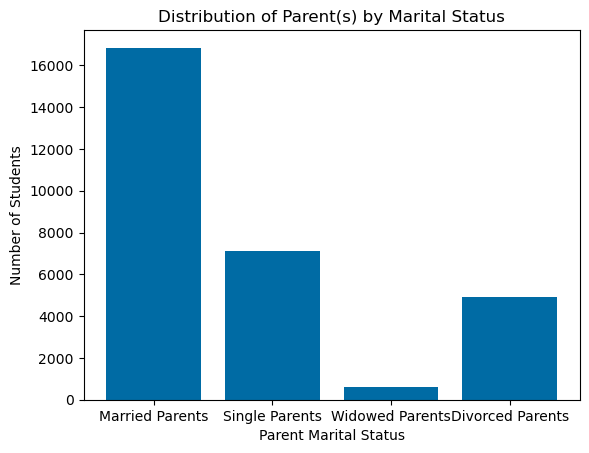

In [159]:
# ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
married_parents_students = data[data["ParentMaritalStatus"] == "married"]
single_parents_students = data[data["ParentMaritalStatus"] == "single"]
widowed_parents_students = data[data["ParentMaritalStatus"] == "widowed"]
divorced_parents_students = data[data["ParentMaritalStatus"] == "divorced"]

num_students_married_parents = len(married_parents_students)
num_students_single_parents = len(single_parents_students)
num_widowed_parents_students = len(widowed_parents_students)
num_divorced_parents_students = len(divorced_parents_students)

# Plotting the distribution of parent(s) by marital status
plt.bar(["Married Parents", "Single Parents", "Widowed Parents", "Divorced Parents"], [num_students_married_parents, num_students_single_parents, num_widowed_parents_students, num_divorced_parents_students])
plt.xlabel("Parent Marital Status")
plt.ylabel("Number of Students")
plt.title("Distribution of Parent(s) by Marital Status")

In [160]:
# 10. Скільки студентів мають одружених батьків?
num_students_married_parents

16844

In [161]:
# 11. Скільки студентів мають батьків-одинаків?
num_students_single_parents

7097

### Дослідіть зв’язок між заняттями спортом і результатами тестів.

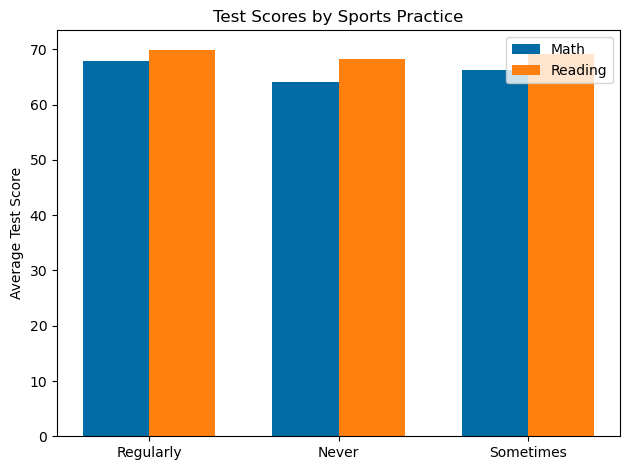

In [162]:
sports_regularly_students = data[data["PracticeSport"] == "regularly"]
sports_never_students = data[data["PracticeSport"] == "never"]
sports_sometimes_students = data[data["PracticeSport"] == "sometimes"]

avg_math_score_sports_regularly = sports_regularly_students["MathScore"].mean()
avg_math_score_sports_never = sports_never_students["MathScore"].mean()
avg_math_score_sports_sometimes = sports_sometimes_students["MathScore"].mean()

avg_reading_score_sports_regularly = sports_regularly_students["ReadingScore"].mean()
avg_reading_score_sports_never = sports_never_students["ReadingScore"].mean()
avg_reading_score_sports_sometimes = sports_sometimes_students["ReadingScore"].mean()

# Plotting the average test scores by sports practice
sports_labels = ["Regularly", "Never", "Sometimes"]
math_scores = [avg_math_score_sports_regularly, avg_math_score_sports_never, avg_math_score_sports_sometimes]
reading_scores = [avg_reading_score_sports_regularly, avg_reading_score_sports_never, avg_reading_score_sports_sometimes]

x = np.arange(len(sports_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, math_scores, width, label="Math")
rects2 = ax.bar(x + width/2, reading_scores, width, label="Reading")

ax.set_ylabel("Average Test Score")
ax.set_title("Test Scores by Sports Practice")
ax.set_xticks(x)
ax.set_xticklabels(sports_labels)
ax.legend()

fig.tight_layout()
plt.show()

In [163]:
# 12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з 
# математики, ніж ті, хто ніколи не займається спортом?
avg_math_score_sports_regularly > avg_math_score_sports_never

True

In [164]:
# 13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, 
# ніж ті, хто ніколи не займається спортом?
avg_reading_score_sports_regularly > avg_reading_score_sports_never

True

### Проаналізуйте розподіл транспортних засобів до школи серед учнів.

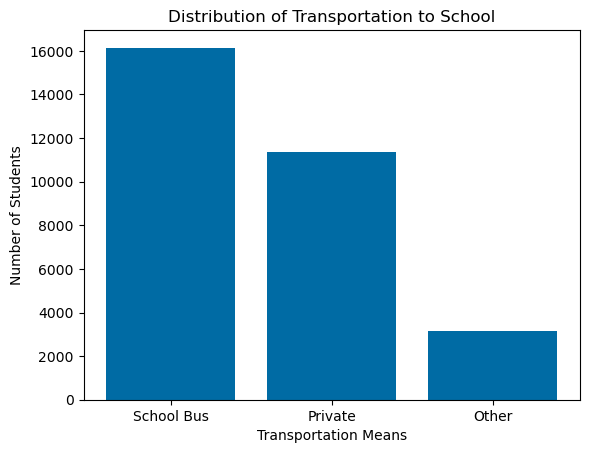

In [165]:
school_bus_students = data[data["TransportMeans"] == "school_bus"]
private_transport_students = data[data["TransportMeans"] == "private"]
other_transport = data[data["TransportMeans"].isna()]

num_students_school_bus = len(school_bus_students)
num_students_private_transport = len(private_transport_students)
num_other_transport = len(other_transport)

# Plotting the distribution of transportation to school
plt.bar(["School Bus", "Private", "Other"], [num_students_school_bus, num_students_private_transport, num_other_transport])
plt.xlabel("Transportation Means")
plt.ylabel("Number of Students")
plt.title("Distribution of Transportation to School")
plt.show()

In [166]:
# 14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?
num_students_school_bus

16145

In [167]:
# 15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?
num_students_private_transport

11362

### Задача класифікації
   Передбачте, чи завершив студент курс підготовки до іспиту, на основі його демографічних та академічних даних.
   
   Вхідні дані:
Gender, EthnicGroup, ParentEduc, LunchType, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings,       TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore
   
   Результат: TestPrep

In [168]:
# Import training and validation sets
df = pd.read_csv("data/Expanded_data_with_more_features.csv", low_memory=False)
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [169]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [171]:
df = df.drop("Unnamed: 0", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [172]:
df = df.dropna()
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [173]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,19243.000000,19243.000000,19243.000000,19243.000000
mean,2.147482,66.635504,69.534324,68.602869
std,1.443735,15.362362,14.785547,15.481824
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,80.000000
max,7.000000,100.000000,100.000000,100.000000


In [174]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [175]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Gender
EthnicGroup
ParentEduc
LunchType
TestPrep
ParentMaritalStatus
PracticeSport
IsFirstChild
TransportMeans
WklyStudyHours


In [176]:
# Turn all the sting values into categories values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               19243 non-null  category
 1   EthnicGroup          19243 non-null  category
 2   ParentEduc           19243 non-null  category
 3   LunchType            19243 non-null  category
 4   TestPrep             19243 non-null  category
 5   ParentMaritalStatus  19243 non-null  category
 6   PracticeSport        19243 non-null  category
 7   IsFirstChild         19243 non-null  category
 8   NrSiblings           19243 non-null  float64 
 9   TransportMeans       19243 non-null  category
 10  WklyStudyHours       19243 non-null  category
 11  MathScore            19243 non-null  int64   
 12  ReadingScore         19243 non-null  int64   
 13  WritingScore         19243 non-null  int64   
dtypes: category(10), float64(1), int64(3)
memory usage: 941.1 KB


In [178]:
df.WklyStudyHours.cat.categories

Index(['5 - 10', '< 5', '> 10'], dtype='object')

In [179]:
def print_lc_is_null(label, content, dataframe):
    """
    Function for beautiful label and content printing
    """
    indent = len(max(dataframe.keys().tolist(), key=len))  # Find the longest column name in DataFrame
    print(f"{label:{indent + 1}} : {content.isnull().sum()}")

In [180]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print_lc_is_null(label, content, df)

Gender               : 0
EthnicGroup          : 0
ParentEduc           : 0
LunchType            : 0
TestPrep             : 0
ParentMaritalStatus  : 0
PracticeSport        : 0
IsFirstChild         : 0
TransportMeans       : 0
WklyStudyHours       : 0


In [181]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

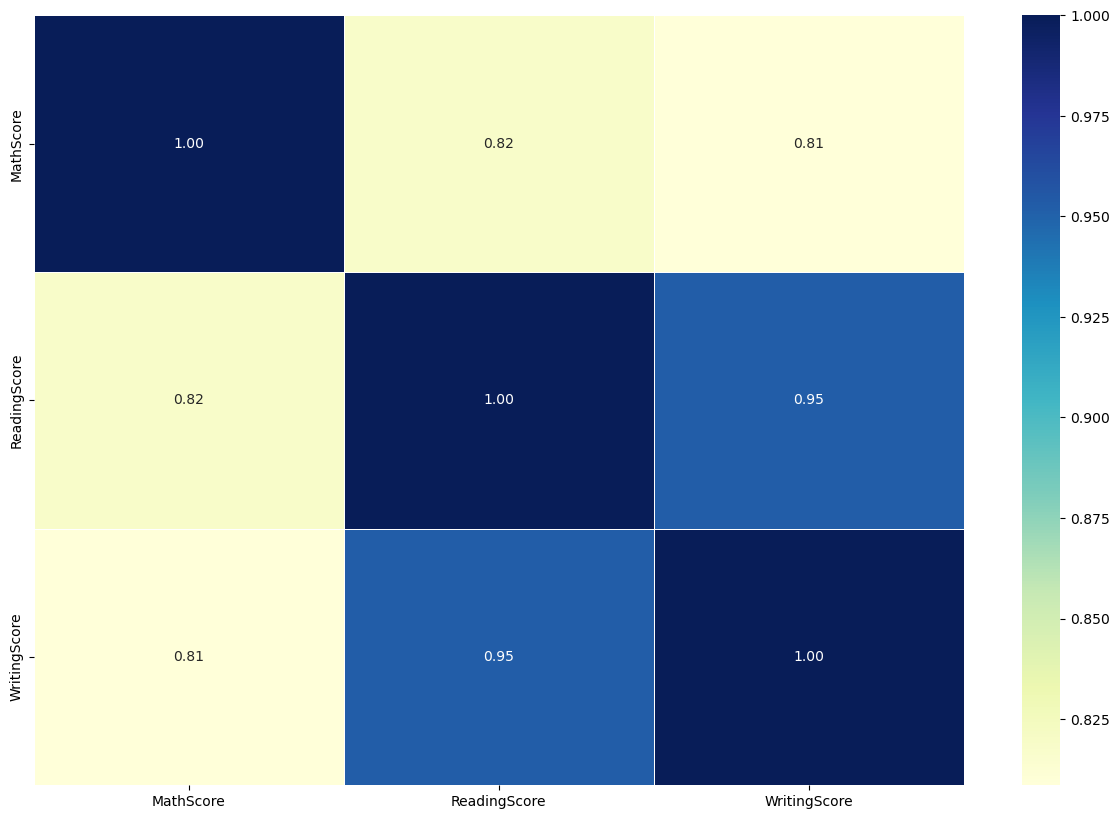

In [182]:
# Let's make correlation matrix
corr_matrix = df[["MathScore","ReadingScore","WritingScore"]].corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [183]:
X, y = df.drop("TestPrep", axis=1), df["TestPrep"]
X, y

(       Gender EthnicGroup          ParentEduc     LunchType  \
 2      female     group B     master's degree      standard   
 4        male     group C        some college      standard   
 5      female     group B  associate's degree      standard   
 6      female     group B        some college      standard   
 7        male     group B        some college  free/reduced   
 ...       ...         ...                 ...           ...   
 30635    male     group C        some college      standard   
 30636  female     group D         high school      standard   
 30637    male     group E         high school      standard   
 30639  female     group D  associate's degree      standard   
 30640    male     group B        some college      standard   
 
       ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
 2                  single     sometimes          yes         4.0   
 4                 married     sometimes          yes         0.0   
 5                 marr

In [184]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15394, 13), (15394,), (3849, 13), (3849,))

In [221]:
# Tasks to perform
cat_steps = [('OHE', OneHotEncoder(drop='first', 
                                   handle_unknown='ignore'))]
# Pipeline object
pipe_cat = Pipeline(cat_steps)

# Tasks to perform
num_steps = [('scale', StandardScaler()) ]

# Pipeline object
pipe_num = Pipeline(num_steps)

# Extracting the names of the categorical variables
categorical_vars = X.select_dtypes('category').columns.tolist()

# Extracting the names of the numerical variables
numerical_vars = X.select_dtypes('number').columns.tolist()

# Creating the multilayer pipe
one_pipe = ColumnTransformer(transformers=[
          ('numbers', pipe_num, numerical_vars),
          ('categories', pipe_cat, categorical_vars) ] )

# Final Pipeline
modeling = Pipeline([
                     ('preprocess', one_pipe), 
                     ('model', RandomForestClassifier()) 
                    ])

# Fit the model to the data
modeling.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['NrSiblings', 'MathScore',
                                                   'ReadingScore',
                                                   'WritingScore']),
                                                 ('categories',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEduc', 'LunchType',
                                                   'ParentMaritalStatus',
                                                   'PracticeSport',
                                                   'IsFirstChild',
                                                   'TransportMeans',
                                                   'WklyStudyHours'])])),
                ('model', RandomForestClassifier())])

In [222]:
modeling.score(X_test, y_test)

0.7118732138217719

In [223]:
# Predict
y_preds = modeling.predict(X_test)

# Data Frame with some predictions
pd.DataFrame({'y_true': y_test, 'prediction': y_preds}).head(10)

,y_true,prediction
14175,none,completed
3427,none,none
27182,none,none
13371,none,none
1887,none,none
6856,completed,completed
19812,completed,completed
11645,none,none
21280,completed,completed
20879,none,none


In [224]:
confusion_matrix(y_test, y_preds)

array([[ 489,  839],
       [ 270, 2251]], dtype=int64)

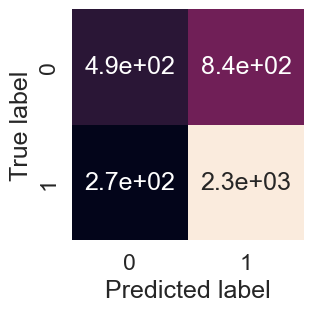

In [225]:
# Increase font size
sns.set(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,  # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")  # predictions go on the x-axis
    plt.ylabel("True label")  # true labels go on the y-axis


plot_conf_mat(y_test, y_preds)

In [226]:
y_test.value_counts()

none         2521
completed    1328
Name: TestPrep, dtype: int64

In [227]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

   completed       0.64      0.37      0.47      1328
        none       0.73      0.89      0.80      2521

    accuracy                           0.71      3849
   macro avg       0.69      0.63      0.64      3849
weighted avg       0.70      0.71      0.69      3849



In [228]:
# Tune RandomForestClassifier model
np.random.seed(42)

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Final Pipeline
modeling = Pipeline([
                     ('preprocess', one_pipe), 
                     ('model', rs_rf) 
                    ])

# Fit the model to the data
modeling.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['NrSiblings', 'MathScore',
                                                   'ReadingScore',
                                                   'WritingScore']),
                                                 ('categories',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEduc', 'LunchType',
                                                   'ParentMaritalStatus',
                                                   'PracticeSp...
                                                   'WklyStudyHours'])])),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=20,
                                    param_distributions={'max_depth': [None, 3,
                                                                       5, 10],
                                                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                                    verbose=True))])

In [229]:
# Predict
y_preds = modeling.predict(X_test)

# Data Frame with some predictions
pd.DataFrame({'y_true': y_test, 'prediction': y_preds}).head(10)

,y_true,prediction
14175,none,completed
3427,none,none
27182,none,none
13371,none,none
1887,none,none
6856,completed,none
19812,completed,completed
11645,none,none
21280,completed,completed
20879,none,none


In [230]:
confusion_matrix(y_test, y_preds)

array([[ 423,  905],
       [ 177, 2344]], dtype=int64)

In [231]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

   completed       0.70      0.32      0.44      1328
        none       0.72      0.93      0.81      2521

    accuracy                           0.72      3849
   macro avg       0.71      0.62      0.63      3849
weighted avg       0.72      0.72      0.68      3849



In [232]:
modeling.score(X_test, y_test)

0.7188880228630813

### I will try LogisticRegression model and tune it using GridSearchCV

In [235]:
# Tune LogisticRegression model
np.random.seed(42)

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
                "penalty": ["l2", "elasticnet"],
                "multi_class": ["auto", "ovr", "multinomial"]
                }

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


# Final Pipeline
modeling = Pipeline([
                     ('preprocess', one_pipe), 
                     ('model', gs_log_reg) 
                    ])

# Fit grid hyperparameter search model for LogisticRegression
modeling.fit(X_train, y_train)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3900 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Programs\miniconda\envs\is\Lib\site-packages

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['NrSiblings', 'MathScore',
                                                   'ReadingScore',
                                                   'WritingScore']),
                                                 ('categories',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEduc', 'LunchType',
                                                   'ParentMaritalStatus',
                                                   'PracticeSp...
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                          'multi_class': ['auto', 'ovr',
                                                          'multinomial'],
                                          'penalty': ['l1', 'l2', 'elasticnet'],
                                          'solver': ['liblinear', 'newton-cg',
                                                     'lbfgs', 'sag', 'saga']},
                              verbose=True))])

In [236]:
modeling.score(X_test, y_test)

0.751623798389192

In [240]:
confusion_matrix(y_test, y_preds)

array([[ 423,  905],
       [ 177, 2344]], dtype=int64)

In [241]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

   completed       0.70      0.32      0.44      1328
        none       0.72      0.93      0.81      2521

    accuracy                           0.72      3849
   macro avg       0.71      0.62      0.63      3849
weighted avg       0.72      0.72      0.68      3849

